# Correlation Coefficient Between Two Random Vectors

Author: Arun Manohar

Email: arunmano121@outlook.com

License: BSD-3-Clause

This script demonstrates that correlation needs to interepreted with caution. Two random vectors are constructed to illustrate this. Multiple trials are performed. Very high values of correlation are observed for two vectors containing random entries upto 128 elements. Treat correlation between two random vectors with caution, particularly small vectors!

In [29]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# initialize empty array to hold abs max corr value and mean corr value
max_corr_arr = np.empty(shape=(0), dtype=float)
med_corr_arr = np.empty(shape=(0), dtype=float)

# draw two random vectors containing k entries
n_veclen = [2**exp for exp in range(1, 15)]
for k in n_veclen:

    # initialize empty array to hold corr value
    corr_arr = np.empty(shape=(0), dtype=float)

    # trials are performed and the maximum value of corr is stored
    n_trials = 1000
    for i in range(n_trials):
        a = np.random.rand(k)  # 1st random vector
        b = np.random.rand(k)  # 2nd random vector

        # computed pearson correlation - 2x2 matrix. The diagonal is
        # auto-correlation. The off-diagonal entries are same.
        # also use absolute value
        this_corr = np.abs(np.corrcoef(a, b)[0, 1])

        # append correlation to array
        corr_arr = np.append(corr_arr, this_corr)

    # calculate max of the absolute value and append to array after excluding nan values
    max_corr_arr = np.append(max_corr_arr,  np.nanmax(corr_arr))
    # calculate median of the absolute value and append to array
    med_corr_arr = np.append(med_corr_arr,  np.nanmedian(corr_arr))

    if k == 2:  # print header row
        print('_'*73)
        print('\nMaximum correlation between two random vectors containing %d elements each' % (k))
        print('-'*73)
        print('Vec. Len.   Abs. Max. Corr.      Median Corr.')

    print('%d \t    %0.3f \t\t %0.3f' % (k, max_corr_arr[-1], med_corr_arr[-1]))

_________________________________________________________________________

Maximum correlation between two random vectors containing 2 elements each
-------------------------------------------------------------------------
Vec. Len.   Abs. Max. Corr.      Median Corr.
2 	    1.000 		 1.000
4 	    1.000 		 0.476
8 	    0.905 		 0.291
16 	    0.768 		 0.168
32 	    0.616 		 0.124
64 	    0.496 		 0.087
128 	    0.273 		 0.062
256 	    0.236 		 0.041
512 	    0.172 		 0.030
1024 	    0.111 		 0.021
2048 	    0.079 		 0.015
4096 	    0.055 		 0.010
8192 	    0.040 		 0.007
16384 	    0.028 		 0.005


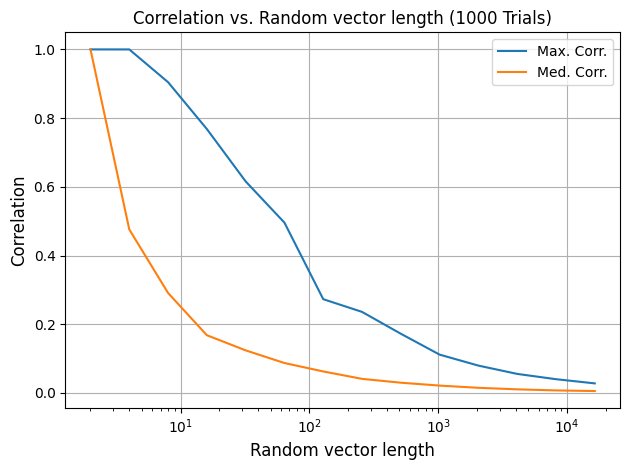

In [69]:
# plot max and median corr value as a function of random vector length
plt.semilogx(n_veclen, max_corr_arr, label='Max. Corr.')
plt.semilogx(n_veclen, med_corr_arr, label='Med. Corr.')
plt.title('Correlation vs. Random vector length (%d Trials)'
          % (n_trials), fontsize=12)
plt.xlabel('Random vector length', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()
